In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [3]:
df = pd.read_csv('homes.csv')
df.head()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
0,142,160,28,10,5,3,60,0.28,3167
1,175,180,18,8,4,1,12,0.43,4033
2,129,132,13,6,3,1,41,0.33,1471
3,138,140,17,7,3,1,22,0.46,3204
4,232,240,25,8,4,3,5,2.05,3613


In this cell, we call the describe() method to get descriptive statistics for each column. The dataframe has 50 instances of 9 variables. 

In [4]:
df.describe()

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,170.360000,178.340000,21.120000,8.060000,3.820000,1.860000,30.220000,1.020600,3706.100000
std,72.755885,79.382723,8.351072,1.284285,0.690755,0.756199,30.962314,1.191496,1579.915268
min,87.000000,90.000000,10.000000,5.000000,3.000000,1.000000,2.000000,0.220000,1445.000000
25%,135.000000,140.000000,17.000000,7.000000,3.000000,1.000000,12.250000,0.382500,3107.000000
50%,152.000000,160.000000,20.000000,8.000000,4.000000,2.000000,24.500000,0.550000,3490.000000
75%,182.250000,190.000000,22.750000,9.000000,4.000000,2.000000,37.000000,1.182500,3919.250000
max,567.000000,625.000000,64.000000,12.000000,6.000000,4.000000,202.000000,6.490000,12192.000000


For the first EDA task, we will have a look at the 'Sell' column and observe the distribution of sale prices in the dataset through a histogram. 

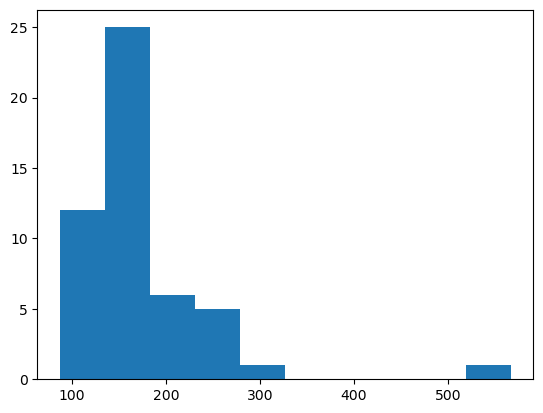

In [5]:
plt.hist(df['Sell'], bins = 10);

As we can see, the sale prices in this dataset are very right skewed. Let's find the row that has the sale price over 500. 

In [6]:
max(df['Sell'])

567

In [7]:
outlier = df.loc[df['Sell'] == 567]
outlier

,Sell,"""List""","""Living""","""Rooms""","""Beds""","""Baths""","""Age""","""Acres""","""Taxes"""
28,567,625,64,11,4,4,4,0.85,12192


Now we can see that this house is quite new compared to the other houses in the dataset, and has nearly 4 times the average taxes. 

For the next EDA task, let's create a scatterplot of all rows using rooms and taxes as our variables. This will allow us to visualize any relationship that may exist between the two.

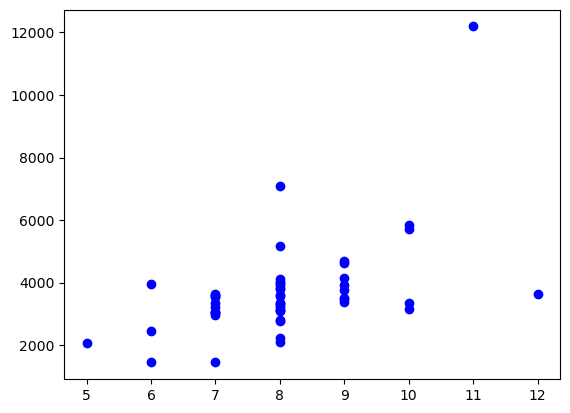

In [8]:
plt.scatter(df[' "Rooms"'], df[' "Taxes"'], c='blue')

From this, there seems to be a positive correlation between number of rooms and amount of taxes due.

Lastly, let's create and visualize a correlation matrix for every column. 

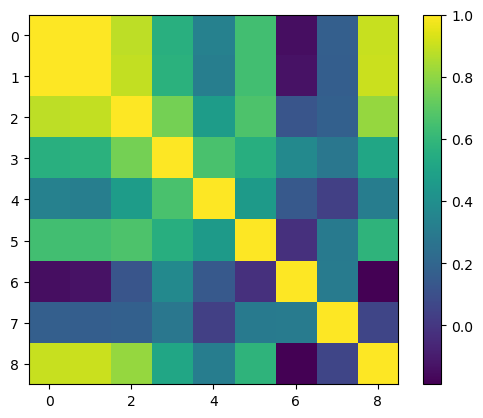

In [9]:
correlation_matrix = df.corr(method = 'pearson')
plt.imshow(correlation_matrix)
plt.colorbar()

This heatmap shows the pearson coefficient between each pair of columns. A lighter color means a higher correlation coefficient, and a darker color means a lower coeffecient. As we can see, age and taxes have a very low coefficient, whereas sell and list price are highly correlated.

Now we will run a linear regression model on Taxes and Sell price.

In [10]:
x = df[' "Taxes"']
y = df['Sell']
x = sm.add_constant(x)
x.head()

,const,"""Taxes"""
0,1.0,3167
1,1.0,4033
2,1.0,1471
3,1.0,3204
4,1.0,3613


In [12]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     203.1
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           7.22e-19
Time:                        19:55:19   Log-Likelihood:                -243.44
No. Observations:                  50   AIC:                             490.9
Df Residuals:                      48   BIC:                             494.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.8719     11.691      1.443      0.155      -6.635      40.378
 "Taxes"       0.0414      0.003     14.250      0.000       0.036       0.047
==============================================================================
Omnibus:                       28.767   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.574
Skew:                           1.690   Prob(JB):                     1.16e-13
Kurtosis:                       7.144   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The results of the regression are displayed above. Based on the p-value of taxes being 0.000, we can determine that the relationship between taxes and sell price is significant. The R-squared and Adjusted R-squared values are .809 and .805, respectively. These values tell us that about 80% of the variance in sell price can be explained by taxes. From this information, I would say that taxes is a fairly strong predictor of sell price. In the next cell, we will perform a linear regression using acres instead of taxes.

In [13]:
x2 = df[' "Acres"']
y2 = df['Sell']

x2 = sm.add_constant(x2)
x2.head()

,const,"""Acres"""
0,1.0,0.28
1,1.0,0.43
2,1.0,0.33
3,1.0,0.46
4,1.0,2.05


In [14]:
model2 = sm.OLS(y2, x2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Sell   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.406
Date:                Wed, 21 Feb 2024   Prob (F-statistic):              0.242
Time:                        20:01:54   Log-Likelihood:                -284.08
No. Observations:                  50   AIC:                             572.2
Df Residuals:                      48   BIC:                             576.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.8457     13.550     11.797      0.000     132.601     187.090
 "Acres"      10.3021      8.687      1.186      0.242      -7.165      27.769
==============================================================================
Omnibus:                       70.495   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              740.048
Skew:                           3.678   Prob(JB):                    2.00e-161
Kurtosis:                      20.353   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the same indicators as before, with a p-value of .242 and adjusted R-squared of .0008, acres seems to be a pretty terrible predictor of sell price. However, the relationship between sell price and acres might not be as bad as this model makes it seem. If we look at the values in the acres and sell price columns, the scales are completely different. Acres has a mean of around 1, whereas sell price has a mean of around 170. Currently, the values in sell price seem to be in thousands of dollars. If we were to adjust these numbers to be in hundreds of thousands, the mean would become around 1.7. This is much closer in scale to the acres column, and would likely improve the statistics from the model.